In [1]:
# 9-period SMA

In [46]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
if not mt5.initialize():
    print("Failed to initialize MT5:", mt5.last_error())
    quit

In [48]:
mt5.login(98612198, "@6IdVxTg", "MetaQuotes-Demo")

True

In [49]:
symbol = "USDJPY"
timeframe = mt5.TIMEFRAME_M15 # 1-hour candles
num_bars = 500 # Number of bars to fetch

In [50]:
# Get Historical Price Data
rates = mt5.copy_rates_from_pos(symbol, timeframe, 0, num_bars)

In [51]:
# Convert to DataFrame
df = pd.DataFrame(rates)
df["time"] = pd.to_datetime(df["time"], unit="s")

In [52]:
# Calculate 9-period and 21-period SMAs

df["SMA_9"] = df["close"].rolling(window=9).mean()
df["SMA_21"] = df["close"].rolling(window=21).mean()


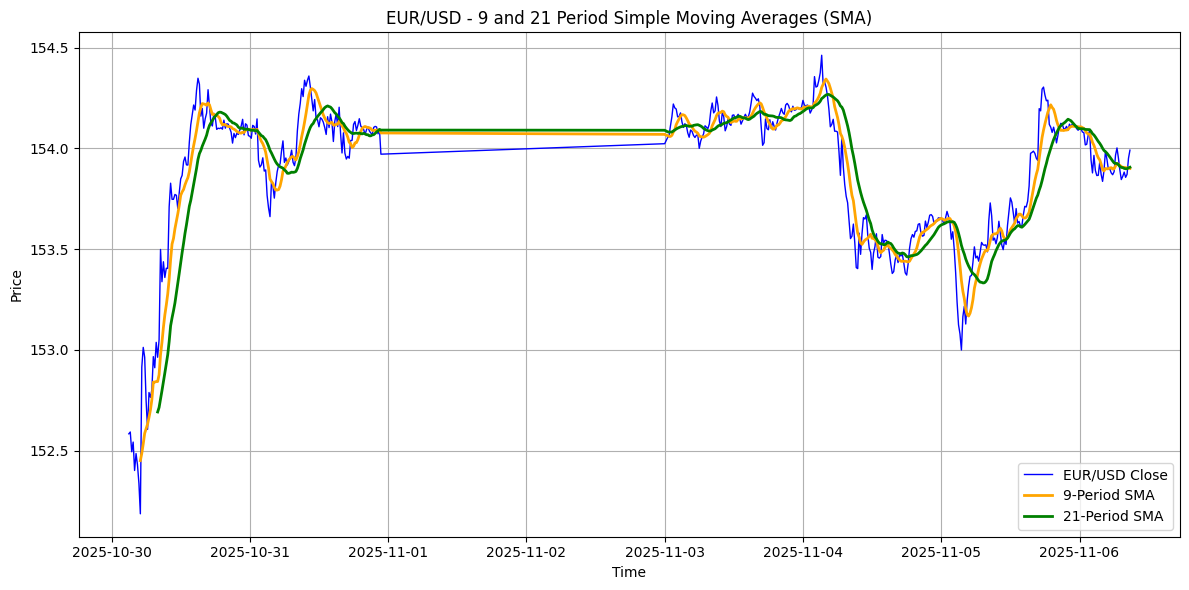

In [53]:
# Plot the results

plt.figure(figsize=(12, 6))
plt.plot(df["time"], df["close"], label="EUR/USD Close", color="blue", linewidth=1)
plt.plot(df["time"], df["SMA_9"], label="9-Period SMA", color="orange", linewidth=2)
plt.plot(df["time"], df["SMA_21"], label="21-Period SMA", color="green", linewidth=2)
plt.title("EUR/USD - 9 and 21 Period Simple Moving Averages (SMA)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()